Empty DataFrame
Columns: [Code, Value, prediction]
Index: []


KeyError: 'prediction'

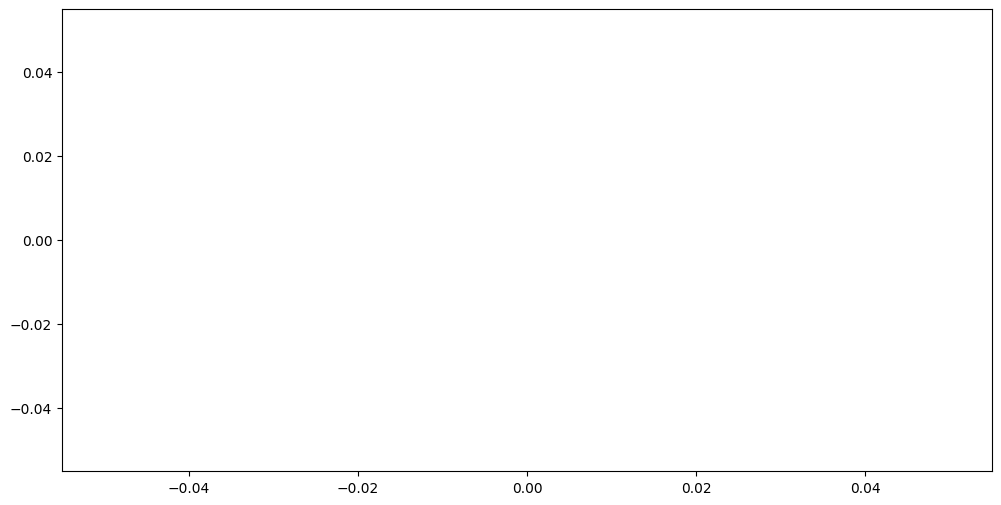

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class Signal:
    def __init__(self, data_path: str):
        self.data = pd.read_csv( 'data.csv', sep=';',  parse_dates=['Date'], decimal=',', dayfirst=True)
        self.data['Date'] = pd.to_datetime(self.data['Date'])
        self.data.set_index('Date', inplace=True)
        self.data['YearMonth'] = self.data.index.to_period('M')
        self.mean = self.data['Value'].mean()
        self.std = self.data['Value'].std()
        
    def process_data(self):
        self.aggregated_data = self.data.groupby(['Code', 'YearMonth'])['Value'].sum().reset_index()
        
    def predict(self, code, horizon):
        code_data = self.aggregated_data[self.aggregated_data['Code'] == code]
        code_data.set_index('YearMonth', inplace=True)
        code_data['prediction'] = code_data['Value'].rolling(window=horizon).mean()
        print(code_data)
    # Upewnij się, że 'Prediction' jest dostępne w code_data
        if 'prediction' not in code_data.columns:
            raise ValueError("Kolumna 'prediction' nie została utworzona.")
    
        return code_data
    
    def plot(self, code):
        code_data = self.aggregated_data[self.aggregated_data['Code'] == code]
        code_data.set_index('YearMonth', inplace=True)
        code_data = code_data[~code_data['Value'].isnull()]
        code_data = code_data[~code_data['Value'].isin([np.inf, -np.inf])]
        plt.figure(figsize=(12, 6))
        plt.plot(code_data.index, code_data['Value'], label='Actual')
        plt.plot(code_data.index, code_data['prediction'], label='prediction', linestyle='--')
        plt.xlabel('YearMonth')
        plt.ylabel('Value')
        plt.title(f'Signal Date for Code {code}')
        plt.legend()
        plt.show()
        
    
    def calculate_mse(self, code):
        code_data = self.aggregated_data[self.aggregated_data['Code'] == code]
        code_data = code_data[~code_data['Value'].isnull()]
        code_data = code_data[~code_data['prediction'].isnull()]
        mse = ((code_data['Value'] - code_data['prediction']) ** 2).mean()
        return mse


signal = Signal('data.csv')

signal.process_data()

# Wybór kodu (np. 'ABC') i horyzontu czasowego (np. 3)
code = 'ABC'
horizon = 3

# Wykonanie predykcji
prediction_data = signal.predict(code, horizon)

# Wyrysowanie wykresu
signal.plot(code)

# Obliczenie błędu średniokwadratowego
mse = signal.calculate_mse(code)
print(f'MSE for Code {code}: {mse}')

# Znajduje się tutaj wizualizacja wykresu wykonanego za pomocą Jupyter Notebook,
# Doszedłem do etapu w którym kod jest w stanie stworzyć wykres lecz niestety nie udało mi sie dojść do powodu przez który nie wyświetla danych na wykresie, najpewniej jest to związane z błędem który znajduje sie w funkcji predict, jednak mimo starań nie udało mi się znaleźć przyczyny tego błedu, moim zdaniem jest to cos niewielkiego z łatwym finalnym rozwiązaniem lecz moge się mylić.